In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
data=pd.read_csv('IMDB Dataset.csv', engine='python', quotechar='"')

In [164]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [165]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [166]:
data.isnull().sum()

,0
review,0
sentiment,0


EDA

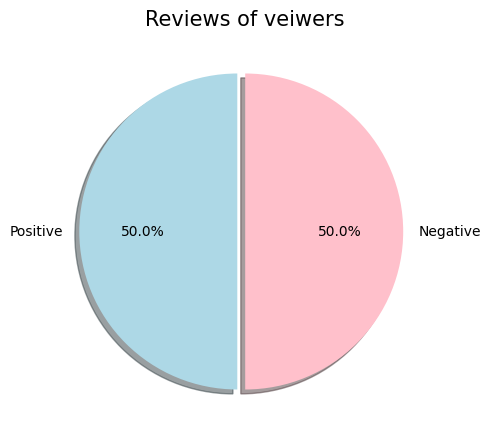

In [167]:
# Get value counts for pie chart
value_counts = data['sentiment'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts,
        labels=['Positive', 'Negative'],
        colors=['lightblue', 'pink'],  # Green for real, red for fake
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0),  # Slight separation for emphasis
        shadow=True)

plt.title('Reviews of veiwers',
          fontsize=15)

plt.tight_layout()
plt.show()

In [168]:
value_counts = data['sentiment'].value_counts()
print(value_counts)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [169]:
data['target'] = data['sentiment'].astype('category').cat.codes
data.head()

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [170]:
data["target"].value_counts()

,count
target,
1,25000
0,25000


Text preprocessing: tokenization, removing stopwords,etc.
Import Regular Expressions:A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

In [171]:
import string
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords once (needed only the first time)
nltk.download("stopwords")

# Get English stopwords
stop_words = set(stopwords.words("english"))

def clean_text(review):
    # 1. Convert all review text to lowercase
    review = review.lower()

    # 2. Replace newline characters with a space
    review = review.replace('\n', ' ')

    # 3. Remove all digits
    review = re.sub(r'\d+', ' ', review)

    # 4. Remove punctuation
    review = review.translate(str.maketrans(' ', ' ', string.punctuation))

    # 5. Replace multiple spaces with a single space
    review = re.sub(r'\s+', ' ', review, flags=re.I)

    # 6. Tokenize review (split into words)
    words = review.split()

    # 7. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 8. Rejoin words back into cleaned review
    return " ".join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
data['review'] = data['review'].apply(clean_text)

In [173]:
data['review']

,review
0,one reviewers mentioned watching oz episode yo...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [175]:
vectorize=TfidfVectorizer()
x=vectorize.fit_transform(data['review'])
y=data['target']

In [176]:
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4988267 stored elements and shape (50000, 175551)>

In [177]:
y

,target
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [179]:
y_test.shape

(15000,)

Using LogisticRegression

In [180]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [181]:
y_pred=model.predict(x_test)

In [182]:
acuracy=accuracy_score(y_test,y_pred)
print(acuracy)

0.8964


In [183]:
C_report=classification_report(y_test,y_pred)
print(C_report)


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [ ]:
while True:
    custom_review = input("Enter a review (or type 'exit' to quit): ")
    if custom_review.lower() == "exit":
        break

    # Clean the review
    cleaned = clean_text(custom_review)

    # Transform using TF-IDF
    vec = vectorize.transform([cleaned])

    # Predict
    prediction = model.predict(vec)[0]

    # Print both numeric and text labels
    sentiment = "Positive" if prediction == 1 else "Negative"

    print(f"Predicted Sentiment: {sentiment} ({prediction})\n")
